----
# Exercice 1 : Classification d'images 
----
# Chargement des packages 

In [1]:
#Annexe(1)

# Chargement des données 

## Données `train`

Ici, nous avons deux datasets : 
- `labels_train`, de taille 0x320, qui correspond au nom des colonnes du dataframe `data_train` que nous allons créer ensuite
- `inputs_train`, de taille 320x10304, on remarque qu'il n'est pas dans le bon sens : on le transposera donc dans la suite. De plus, ce dataset correspond aux données de notre dataframe, en effet nous avons 320 variables et 10304 données. 

In [2]:
#Annexe(2)

Taille du data set labels_train :  (0, 320)
Taille du data set inputs_train : (320, 10304)
Taille du data set data_train : (10304, 320)


,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,2,2.1,...,39.6,39.7,40,40.1,40.2,40.3,40.4,40.5,40.6,40.7
0,0.18824,0.23529,0.15294,0.24706,0.25098,0.16863,0.16078,0.17255,0.13725,0.14510,...,0.36471,0.34510,0.46667,0.49804,0.51373,0.50980,0.50196,0.48235,0.50588,0.49020
1,0.17647,0.22745,0.17255,0.21961,0.23529,0.17647,0.17255,0.17255,0.13725,0.14118,...,0.35686,0.34118,0.47843,0.51765,0.51373,0.49412,0.50588,0.50196,0.50980,0.47451
2,0.17647,0.26667,0.23137,0.20392,0.24706,0.22353,0.18824,0.16078,0.14118,0.14902,...,0.36078,0.33333,0.47059,0.50196,0.49804,0.48235,0.49412,0.49412,0.49804,0.47843
3,0.19216,0.30980,0.21176,0.15686,0.20784,0.20392,0.17255,0.17647,0.15294,0.13725,...,0.36078,0.32941,0.48627,0.49020,0.49020,0.48235,0.50196,0.51373,0.50588,0.47451
4,0.18039,0.19216,0.24314,0.16863,0.23529,0.17647,0.19608,0.18824,0.14902,0.14902,...,0.35686,0.33725,0.48235,0.51373,0.49020,0.50196,0.50980,0.49804,0.49804,0.47059


Nous allons utiliser la fonction `describe` afin de décrire nos données dans l'ensemble : 

In [3]:
#Annexe(3)

,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,2,2.1,...,39.6,39.7,40,40.1,40.2,40.3,40.4,40.5,40.6,40.7
count,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,...,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000
mean,0.503287,0.580349,0.519982,0.557448,0.559896,0.561658,0.527372,0.503563,0.439190,0.438019,...,0.346913,0.355967,0.468399,0.495325,0.498064,0.455536,0.505689,0.471773,0.501368,0.470755
std,0.209083,0.156967,0.206464,0.186317,0.189257,0.163010,0.193482,0.223348,0.189922,0.193960,...,0.145624,0.148600,0.165969,0.165586,0.167826,0.172347,0.167453,0.168486,0.166460,0.171829
min,0.043137,0.007843,0.027451,0.019608,0.027451,0.027451,0.035294,0.031373,0.011765,0.035294,...,0.015686,0.007843,0.019608,0.066667,0.058824,0.019608,0.058824,0.039216,0.054902,0.019608
25%,0.282350,0.556860,0.356860,0.450980,0.446080,0.521570,0.396080,0.305880,0.258820,0.247060,...,0.239220,0.250980,0.360780,0.360780,0.368630,0.345100,0.372550,0.364710,0.368630,0.360780
50%,0.596080,0.635290,0.611760,0.623530,0.623530,0.623530,0.603920,0.572550,0.498040,0.494120,...,0.333330,0.345100,0.466670,0.490200,0.494120,0.447060,0.498040,0.466670,0.498040,0.466670
75%,0.674510,0.674510,0.670590,0.705880,0.705880,0.670590,0.670590,0.694120,0.584310,0.588240,...,0.443140,0.450980,0.596080,0.631370,0.635290,0.584310,0.643140,0.603920,0.635290,0.611760
max,0.917650,0.874510,0.909800,0.843140,0.870590,0.882350,0.835290,0.858820,0.905880,0.921570,...,0.811760,0.823530,0.815690,0.800000,0.800000,0.807840,0.811760,0.823530,0.800000,0.827450


## Données `test` 

Ici, de la même façon que précédemment, nous avons deux datasets : 
- `labels_test`, de taille 0x80, qui correspond au nom des colonnes du dataframe `data_test` que nous allons créer ensuite
- `inputs_test`, de taille 80x10304, on remarque qu'il n'est pas dans le bon sens : on le transposera donc dans la suite. De plus, ce dataset correspond aux données de notre dataframe, en effet nous avons 80 variables et 10304 données. 

In [4]:
#Annexe(4)

Taille du data set labels_test : (0, 80)
Taille du data set inputs_test : (80, 10304)
Taille du data set data_test : (10304, 80)


,1,1.1,2,2.1,3,3.1,4,4.1,5,5.1,...,36,36.1,37,37.1,38,38.1,39,39.1,40,40.1
0,0.164706,0.133333,0.168627,0.145098,0.407843,0.407843,0.447059,0.466667,0.494118,0.486275,...,0.176471,0.184314,0.474510,0.454902,0.423529,0.423529,0.337255,0.349020,0.466667,0.490196
1,0.160784,0.137255,0.149020,0.121569,0.407843,0.400000,0.443137,0.474510,0.494118,0.494118,...,0.180392,0.172549,0.474510,0.466667,0.443137,0.400000,0.333333,0.341176,0.462745,0.486275
2,0.211765,0.133333,0.152941,0.133333,0.415686,0.419608,0.462745,0.478431,0.501961,0.494118,...,0.172549,0.192157,0.466667,0.462745,0.443137,0.411765,0.341176,0.341176,0.470588,0.474510
3,0.188235,0.133333,0.145098,0.149020,0.419608,0.427451,0.450980,0.470588,0.501961,0.486275,...,0.172549,0.184314,0.474510,0.474510,0.439216,0.411765,0.345098,0.356863,0.474510,0.505882
4,0.168627,0.149020,0.156863,0.160784,0.419608,0.407843,0.458824,0.466667,0.501961,0.490196,...,0.188235,0.160784,0.458824,0.470588,0.435294,0.403922,0.341176,0.345098,0.470588,0.498039


Nous allons utiliser la fonction `describe` afin de décrire nos données dans l'ensemble :


In [5]:
#Annexe(5)

,1,1.1,2,2.1,3,3.1,4,4.1,5,5.1,...,36,36.1,37,37.1,38,38.1,39,39.1,40,40.1
count,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,...,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000
mean,0.526433,0.520851,0.439705,0.455156,0.463650,0.461240,0.447908,0.477548,0.526474,0.541306,...,0.427085,0.443841,0.456895,0.454938,0.443516,0.412242,0.336785,0.330007,0.510564,0.462605
std,0.217264,0.203478,0.195959,0.185628,0.195238,0.196283,0.184987,0.193635,0.144017,0.146519,...,0.215501,0.220288,0.198393,0.197396,0.210156,0.191543,0.146230,0.142156,0.170445,0.165894
min,0.058824,0.003922,0.047059,0.003922,0.011765,0.007843,0.054902,0.035294,0.039216,0.121569,...,0.000000,0.000000,0.035294,0.050980,0.035294,0.011765,0.035294,0.019608,0.054902,0.023529
25%,0.360784,0.376471,0.262745,0.333333,0.301961,0.294118,0.298039,0.313725,0.407843,0.431373,...,0.203922,0.219608,0.286275,0.286275,0.270588,0.266667,0.235294,0.223529,0.376471,0.364706
50%,0.600000,0.588235,0.494118,0.501961,0.450980,0.447059,0.447059,0.474510,0.513725,0.521569,...,0.447059,0.478431,0.443137,0.443137,0.439216,0.400000,0.333333,0.329412,0.505882,0.458824
75%,0.701961,0.686275,0.596078,0.592157,0.627451,0.627451,0.584314,0.654902,0.643137,0.674510,...,0.623529,0.635294,0.635294,0.635294,0.627451,0.560784,0.419608,0.411765,0.654902,0.580392
max,0.858824,0.850980,0.905882,0.917647,0.819608,0.815686,0.890196,0.823529,0.815686,0.811765,...,0.937255,0.984314,0.941176,0.905882,0.807843,0.827451,0.800000,0.788235,0.819608,0.807843


# Question 1 : Représentation graphique du visage moyen de `data_train`

On commence par calculer la moyenne par ligne de notre dataframe : 

In [6]:
#Annexe(6)

0        0.335306
1        0.335686
2        0.336360
3        0.335760
4        0.336470
           ...   
10299    0.278149
10300    0.280747
10301    0.277941
10302    0.284546
10303    0.288481
Length: 10304, dtype: float64

On affiche ensuite le résultat : 

Text(0.5, 1.0, 'Représentation du visage moyen')

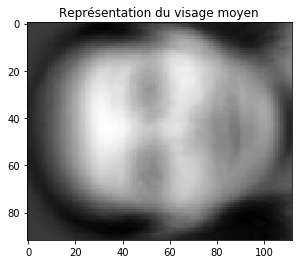

In [7]:
#Annexe(7)

# Question 2 :  ACP afin de réduire les dimensions 
Nous allons réaliser plusieurs ACP sur notre dataframe `data_train` afin de réduire la dimension, on rappelle que nos variables sont bien quantitatives.  
Pour cela, nous utilisons l’ACP du package `sklearn.decomposition`.  
Nous réduirons notre dataset pour k = 5, 10 et 50.

## 1) ACP pour k = 5

In [8]:
#Annexe(8)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Nous créons un tableau récapitulatif des données importantes donnée par le résultat de l'ACP qui résume, pour chaque dimension, sa valeur propre associée et le pourcentage de variance qu'elle explique. Une dernière colonne sera consacrée à la somme cumulée des pourcentages de variance expliquée : 

In [9]:
#Annexe(9)

,Dimension,Valeur propre,% Variance expliquée,% cum. var. expliquée
0,Dim1,4.918492,44.0,44.0
1,Dim2,1.206467,11.0,54.0
2,Dim3,0.506442,4.0,59.0
3,Dim4,0.446016,4.0,63.0
4,Dim5,0.297703,3.0,66.0


On remarque donc, que pour k = 5, il y a 66% de la variance expliquée.  
Nous souhaitons représenter graphiquement les variances expliquées, passée en pourcentage.  
De plus, nous remarquons qu'au delà des deux premiers axes, la variance expliquée ne dépasse pas les 5%.

Text(4, 6, '5%')

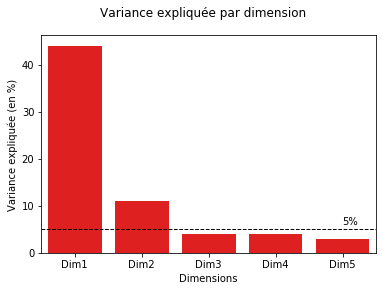

In [10]:
#Annexe(10)

## 2) ACP pour k = 10

In [11]:
#Annexe(11)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Nous créons un tableau récapitulatif des données importantes donnée par le résultat de l'ACP qui résume, pour chaque dimension, sa valeur propre associée et le pourcentage de variance qu'elle explique. Une dernière colonne sera consacrée à la somme cumulée des pourcentages de variance expliquée :

In [12]:
#Annexe(12)

,Dimension,Valeur propre,% Variance expliquée,% cum. var. expliquée
0,Dim1,4.918492,44.0,44.0
1,Dim2,1.206467,11.0,54.0
2,Dim3,0.506442,4.0,59.0
3,Dim4,0.446016,4.0,63.0
4,Dim5,0.297703,3.0,66.0
5,Dim6,0.232853,2.0,68.0
6,Dim7,0.188283,2.0,69.0
7,Dim8,0.177390,2.0,71.0
8,Dim9,0.144764,1.0,72.0
9,Dim10,0.133139,1.0,73.0


On remarque donc, que pour k = 10, il y a 73% de la variance expliquée. De plus, on voit qu'à partir de la neuvième dimension la variance expliquée est égale à 1% ce qui paraît très faible.   
Nous souhaitons représenter graphiquement les variances expliquées, passée en pourcentage.

Text(9, 6, '5%')

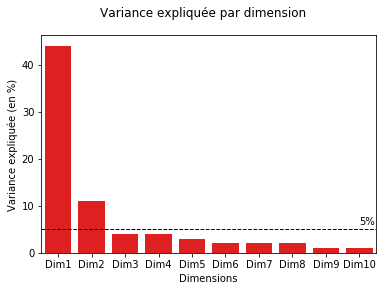

In [13]:
#Annexe(13)

## 3) ACP pour k = 50

In [14]:
#Annexe(14)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Nous créons un tableau récapitulatif des données importantes donnée par le résultat de l'ACP qui résume, pour chaque dimension, sa valeur propre associée et le pourcentage de variance qu'elle explique. Une dernière colonne sera consacrée à la somme cumulée des pourcentages de variance expliquée :

In [15]:
#Annexe(15)

,Dimension,Valeur propre,% Variance expliquée,% cum. var. expliquée
0,Dim1,4.918492,44.0,44.0
1,Dim2,1.206467,11.0,54.0
2,Dim3,0.506442,4.0,59.0
3,Dim4,0.446016,4.0,63.0
4,Dim5,0.297703,3.0,66.0
5,Dim6,0.232853,2.0,68.0
6,Dim7,0.188283,2.0,69.0
7,Dim8,0.177390,2.0,71.0
8,Dim9,0.144764,1.0,72.0
9,Dim10,0.133139,1.0,73.0


On remarque donc, que pour k = 50, il y a 88% de la variance expliquée. De plus, on a vu qu'à partir de la neuvième dimension la variance expliquée est égale à 1% ce qui paraît très faible ; et à partir de la dimension 20 la variance expliquée est très très faible. Nous pouvons le constater sur le graphique suivant qui représente graphiquement les variances expliquées, passée en pourcentage.

Text(46, 6, '1%')

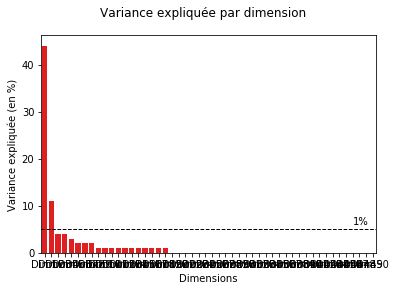

In [16]:
#Annexe(16)

# Question 3 : Choix d'un visage et représentation 
Nous allons choisir un visage et le représenter graphiquement pour les différentes valeurs de k = 5, 10 et 50.  
Nous avons décider de choisir le premier visage de notre jeu de données et le représenter pour les trois valeurs de k. 

## 1) Affichage du visage de la première personne de notre dataframe après réduction de dimension pour k = 5

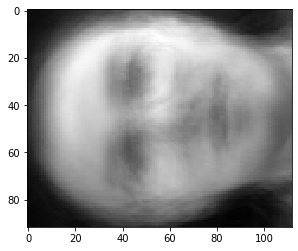

In [17]:
#Annexe(17)

## 2) Affichage du visage de la première personne de notre dataframe après réduction de dimension pour k = 10

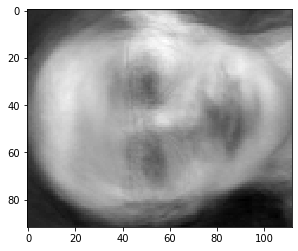

In [18]:
#Annexe(18)

## 3) Affichage du visage de la première personne de notre dataframe après réduction de dimension pour k = 50

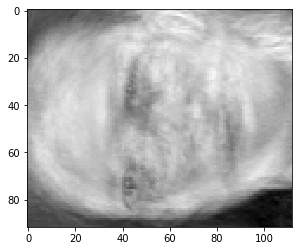

In [20]:
#Annexe(19)

# Question 4 
Avec l'aide des questions ci-dessus, on remarque, qu'en effet l'ACP est très longue en cas de variables nombreuses.
En cela nous nous proposons comme solution de travailler sur le dataset réduis et d'appliquer notre ACP dessus.
Toute fois le choix du nombre de composantes expliquant la variance du nuage est très importante, grâce aux essais fait précédement, nous allons être amené à choisir le bon nombre de composantes grâce aux variances expliquées à l'aide d'une réduction de 50 composantes. 

# Question 5 : Méthode des k plus proches voisins
Nous allons utiliser la méthode des **KNN** se trouvant dans le package `sklearn.neighbors`, afin de classifier les images du test.  
Toutefois nous devons faire varier notre K et calculer l'erreur moyenne pour chaque K, ensuite au moyen d'un graphique nous déterminerons le meilleur K possible pour notre prédiction afin d'éviter un surraprentissage.
## 1) pour k = 5

C:\Users\lulu\Miniconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\lulu\Miniconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


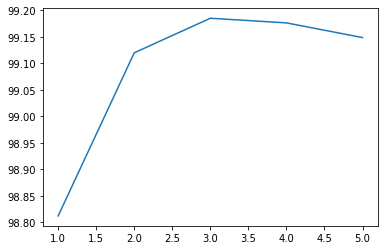

In [21]:
#Annexe(20)

On remarque que pour k = 3, on a un score assez élevé :  un peu plus de 99.15%.  
Nous aurons donc tendence à choisir 3 plus proche voisins afin de prédire la morphologie du visage.   
Au dessus de cette valeur, nous sommes dans le cas du suraprentissage : cela ne sert a rien de prendre un k plus grand.

## 2) pour k = 10

C:\Users\lulu\Miniconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\lulu\Miniconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


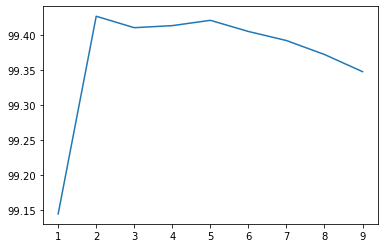

In [22]:
#Annexe(21)

On remarque que pour k = 2, on a un score assez élevé : un peu plus de 99.40%.  
Nous aurons donc tendence à choisir 2 plus proche voisins afin de prédire la morphologie du visage.   
Au dessus de k = 5, nous sommes dans le cas du suraprentissage : cela ne sert a rien de prendre un k plus grand.

## 2) pour k = 50

C:\Users\lulu\Miniconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\lulu\Miniconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


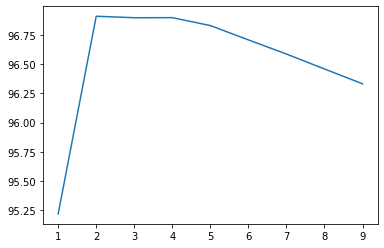

In [24]:
#Annexe(22)

On remarque que pour k = 3, on a un score assez élevé : un peu plus de 96.75%.  
Nous aurons donc tendence à choisir 3 plus proche voisins afin de prédire la morphologie du visage.   
Au dessus de k = 5, nous sommes dans le cas du suraprentissage : cela ne sert a rien de prendre un k plus grand.

# Question 6 
Afin d'améliorer le modèle, il faudrait être sur que l'on est pris les meilleures données d'apprentissages capable de faire la meilleure regression possible. Un moyen serait, par exemple, de faire une *Crossed Validation* avec **n** folds (généralement on prend entre 5 et 10), ainsi on procède à des ACP sur chaque jeu d'apprentissage sans le k-eme fold et l'on calcule le MSEP de chaque régression :  on pourra ainsi faire un graphique permettant de décider quel fold sera pris comme jeu de test et comme jeu d'apprentissage. 

----
# Annexe

In [1]:
#Annexe(1)
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
#Annexe (2)
labels_train = pd.read_csv('Faces_Train_Labels.csv', sep = ',')
inputs_train = pd.read_csv('Faces_Train_Inputs.csv', sep = ',', header = None)

print('Taille du data set labels_train : ',labels_train.shape)
print('Taille du data set inputs_train :', inputs_train.shape)

labels = labels_train.columns.values
index = [p for p in range(0,10304)]

data_train = pd.DataFrame(inputs_train.T)
data_train.columns = labels[0:320]
data_train.index = index

print('Taille du data set data_train :', data_train.shape)
data_train.head()

In [ ]:
#Annexe(3)
data_train.describe()

In [ ]:
#Annexe(4)
labels_test = pd.read_csv('Faces_Test_Labels.csv', sep = ',')
inputs_test = pd.read_csv('Faces_Test_Inputs.csv', sep = ',', header = None)

print('Taille du data set labels_test :',labels_test.shape)
print('Taille du data set inputs_test :',inputs_test.shape)

labels1 = labels_test.columns.values
index1 = [p for p in range(0,10304)]

data_test = pd.DataFrame(inputs_test.T)
data_test.columns = labels1[0:320]
data_test.index = index1

print('Taille du data set data_test :',data_test.shape)
data_test.head()

In [ ]:
#Annexe(5)
data_test.describe()

In [ ]:
#Annexe(6)
data_train_moy = data_train.mean(axis=1)
data_train_moy

In [ ]:
#Annexe(7)
visage_moyen = data_train_moy.values.reshape(92,112) #Matrice de taille 92x112

# On peut ainsi afficher le graphique du visage moyen.
plt.imshow(visage_moyen, cmap=plt.cm.gray)
plt.title('Représentation du visage moyen')

In [ ]:
#Annexe(8)
pca5 =PCA(n_components = 5)
pca5.fit(data_train)

In [ ]:
#Annexe(9)
tab_recap5 = pd.DataFrame(
    {
        'Dimension' : ['Dim' + str(x + 1) for x in range(5)], 
        'Valeur propre' : pca5.explained_variance_,
        '% Variance expliquée' : np.round(pca5.explained_variance_ratio_ * 100),
        '% cum. var. expliquée' : np.round(np.cumsum(pca5.explained_variance_ratio_) * 100)},
    columns = ['Dimension', 'Valeur propre', '% Variance expliquée', '% cum. var. expliquée']
)

tab_recap5

In [ ]:
#Annexe(10)
rpz5 = sb.barplot(x = 'Dimension', 
                y = '% Variance expliquée',
                color = 'red',
                data = tab_recap5)

rpz5.set(ylabel = 'Variance expliquée (en %)', xlabel = 'Dimensions')
rpz5.figure.suptitle('Variance expliquée par dimension')
plt.axhline(y = 5, linewidth = 1, color = 'black', linestyle = '--')
plt.text(4, 6, '5%')

In [ ]:
#Annexe(11)
pca10 =PCA(n_components = 10)
pca10.fit(data_train)

In [ ]:
#Annexe(12)
tab_recap10 = pd.DataFrame(
    {
        'Dimension' : ['Dim' + str(x + 1) for x in range(10)], 
        'Valeur propre' : pca10.explained_variance_,
        '% Variance expliquée' : np.round(pca10.explained_variance_ratio_ * 100),
        '% cum. var. expliquée' : np.round(np.cumsum(pca10.explained_variance_ratio_) * 100)},
    columns = ['Dimension', 'Valeur propre', '% Variance expliquée', '% cum. var. expliquée']
)

tab_recap10

In [ ]:
#Annexe(13)
rpz10 = sb.barplot(x = 'Dimension', 
                y = '% Variance expliquée',
                color = 'red',
                data = tab_recap10)

rpz10.set(ylabel = 'Variance expliquée (en %)', xlabel = 'Dimensions')
rpz10.figure.suptitle('Variance expliquée par dimension')
plt.axhline(y = 5, linewidth = 1, color = 'black', linestyle = '--')
plt.text(9, 6, '5%')

In [ ]:
#Annexe(14)
pca50 =PCA(n_components = 50)
pca50.fit(data_train)

In [ ]:
#Annexe(15)
tab_recap50 = pd.DataFrame(
    {
        'Dimension' : ['Dim' + str(x + 1) for x in range(50)], 
        'Valeur propre' : pca50.explained_variance_,
        '% Variance expliquée' : np.round(pca50.explained_variance_ratio_ * 100),
        '% cum. var. expliquée' : np.round(np.cumsum(pca50.explained_variance_ratio_) * 100)},
    columns = ['Dimension', 'Valeur propre', '% Variance expliquée', '% cum. var. expliquée']
)

tab_recap50

In [ ]:
#Annexe(16)
rpz50 = sb.barplot(x = 'Dimension', 
                y = '% Variance expliquée',
                color = 'red',
                data = tab_recap50)

rpz50.set(ylabel = 'Variance expliquée (en %)', xlabel = 'Dimensions')
rpz50.figure.suptitle('Variance expliquée par dimension')
plt.axhline(y = 5, linewidth = 1, color = 'black', linestyle = '--')
plt.text(46, 6, '1%')

In [ ]:
#Annexe(17)
#Travail préliminaire
#On commence par récupérer les vecteurs dans l'attribut components_ que l'on tranpose 
mat_pca5 = pca5.components_.T
mat_pca5.shape #(320x5) : on a 320 données réparties en 5 vecteurs (64 valeurs/vecteur)

#On multiplie ensuite la matrice obtenue par notre dataframe 
mat_5 = np.dot(data_train, mat_pca5)

#On multiplie ensuite notre première matrice avec notre matrice précédente afin d'avoir notre matrice
#finale après réduction de dimension pour k = 5
mat5 = np.dot(mat_pca5, mat_5.T)

plt.imshow(mat5[1,].reshape(92,112), cmap=plt.cm.gray)

In [ ]:
#Annexe(18)
#Travail préliminaire
#On commence par récupérer les vecteurs dans l'attribut components_ que l'on tranpose 
mat_pca10 = pca10.components_.T
mat_pca10.shape #(320x10) : on a 320 données réparties en 10 vecteurs (32 valeurs/vecteur)

#On multiplie ensuite la matrice obtenue par notre dataframe 
mat_10 = np.dot(data_train, mat_pca10)

#On multiplie ensuite notre première matrice avec notre matrice précédente afin d'avoir notre matrice
#finale après réduction de dimension pour k = 10
mat10 = np.dot(mat_pca10, mat_10.T)

plt.imshow(mat10[1,].reshape(92,112), cmap=plt.cm.gray)

In [ ]:
#Annexe(19)
#Travail préliminaire
#On commence par récupérer les vecteurs dans l'attribut components_ que l'on tranpose 
mat_pca50 = pca50.components_.T
mat_pca50.shape #(320x50) : on a 320 données réparties en 50 vecteurs

#On multiplie ensuite la matrice obtenue par notre dataframe 
mat_50 = np.dot(data_train, mat_pca50)

#On multiplie ensuite notre première matrice avec notre matrice précédente afin d'avoir notre matrice
#finale après réduction de dimension pour k = 50
mat50 = np.dot(mat_pca50, mat_50.T)

plt.imshow(mat50[1,].reshape(92,112), cmap=plt.cm.gray)

In [ ]:
#Annexe(20)
#On applique l'ACP à 5 composantes au dataset data_test
pca5_t =PCA(n_components = 5)
pca5_t.fit(data_test)

#On commence par récupérer les vecteurs dans l'attribut components_ que l'on tranpose 
mat_pca5_t = pca5_t.components_.T
mat_pca5_t.shape #(80x5) : on a 80 données réparties en 5 vecteurs

#On multiplie ensuite la matrice obtenue par notre dataframe 
mat_5_t = np.dot(data_test, mat_pca5_t)

#On multiplie ensuite notre première matrice avec notre matrice précédente afin d'avoir notre matrice
#finale après réduction de dimension pour k = 5
mat5_t = np.dot(mat_pca5_t, mat_5_t.T)

# Nous allons commencer par séparer nos datasets en donéees d'apprentissage et de tests grace au train_test_split
X_train, X_test, y_train, y_test = train_test_split(mat5.T, mat5_t.T, random_state = 2)

K = range(1, 6)
score_knn = []
for i in K:
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(X_train, y_train)
    le_score = knn.score(X_test, y_test)
    score_knn.append(le_score*100)

sb.lineplot(K, score_knn)

In [ ]:
#Annexe(21)
#On applique l'ACP à 10 composantes au dataset data_test
pca10_t =PCA(n_components = 10)
pca10_t.fit(data_test)

#On commence par récupérer les vecteurs dans l'attribut components_ que l'on tranpose 
mat_pca10_t = pca5_t.components_.T
mat_pca10_t.shape #(80x10) : on a 80 données réparties en 10 vecteurs

#On multiplie ensuite la matrice obtenue par notre dataframe 
mat_10_t = np.dot(data_test, mat_pca10_t)

#On multiplie ensuite notre première matrice avec notre matrice précédente afin d'avoir notre matrice
#finale après réduction de dimension pour k = 10
mat10_t = np.dot(mat_pca10_t, mat_10_t.T)
mat10_t.shape

X_train, X_test, y_train, y_test = train_test_split(mat10.T, mat10_t.T, random_state = 3)

K = range(1, 10)
score_knn = []
for i in K:
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(X_train, y_train)
    le_score = knn.score(X_test, y_test)
    score_knn.append(le_score*100)

sb.lineplot(K, score_knn)

In [ ]:
#Annexe(22)
#On applique l'ACP à 50 composantes au dataset data_test
pca50_t =PCA(n_components = 50)
pca50_t.fit(data_test)

#On commence par récupérer les vecteurs dans l'attribut components_ que l'on tranpose 
mat_pca50_t = pca50_t.components_.T
mat_pca50_t.shape #(80x50) : on a 80 données réparties en 50 vecteurs

#On multiplie ensuite la matrice obtenue par notre dataframe 
mat_50_t = np.dot(data_test, mat_pca50_t)

#On multiplie ensuite notre première matrice avec notre matrice précédente afin d'avoir notre matrice
#finale après réduction de dimension pour k = 50
mat50_t = np.dot(mat_pca50_t, mat_50_t.T)
mat50_t.shape

X_train, X_test, y_train, y_test = train_test_split(mat50.T, mat50_t.T, random_state = 3)

K = range(1, 10)
score_knn = []
for i in K:
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(X_train, y_train)
    le_score = knn.score(X_test, y_test)
    score_knn.append(le_score*100)

sb.lineplot(K, score_knn)